In [1]:
#imported module
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#imported csv file
bank = pd.read_csv('bank.csv',sep=';')

In [3]:
#cleaned dataset from NaN Value
bank.dropna()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,Target
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,no


In [4]:
#defined variable
job=bank[bank.columns.values[1]][0:]
marital=bank[bank.columns.values[2]][0:]
education=bank[bank.columns.values[3]][0:]
housing=bank[bank.columns.values[5]][0:]
loan=bank[bank.columns.values[6]][0:]
contact=bank[bank.columns.values[7]][0:]
month=bank[bank.columns.values[9]][0:]

# OBTAINED UNIQUE VALUE FOR EACH VARIABLE

In [5]:
job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [6]:
marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [7]:
education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [8]:
housing.unique()

array(['yes', 'no'], dtype=object)

In [9]:
loan.unique()

array(['no', 'yes'], dtype=object)

In [10]:
contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [11]:
month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

# CONVERT STRING INTO NUMBER

In [12]:
#convert string into number
def job_new(bank):
    if(bank['job']) == 'management':
        return '1'
    elif (bank['job']) == 'technician':
        return '2'
    elif (bank['job']) == 'entrepreneur':
        return '3'
    elif (bank['job']) == 'blue-collar':
        return '4'
    elif (bank['job']) == 'unknown':
        return '5'
    elif (bank['job']) == 'retired':
        return '6'
    elif (bank['job']) == 'admin.':
        return '7'
    elif (bank['job']) == 'services':
        return '8'
    elif (bank['job']) == 'self-employed':
        return '9'
    elif (bank['job']) == 'unemployed':
        return '10'
    elif (bank['job']) == 'housemaid':
        return '11'
    elif (bank['job']) == 'student':
        return '12'

bank['jobnew'] = bank.apply(job_new,axis=1)

In [13]:
def marital_new(bank):
    if(bank['marital']) == 'married':
        return '1'
    elif (bank['marital']) == 'single':
        return '2'
    elif (bank['marital']) == 'divorced':
        return '3'
    
bank['maritalnew'] = bank.apply(marital_new,axis=1)

In [33]:
def education_new(bank):
    if(bank['education']) == 'tertiary':
        return '1'
    elif (bank['education']) == 'secondary':
        return '2'
    elif (bank['education']) == 'unknown':
        return '3'
    elif (bank['education']) == 'primary':
        return '4'
    
bank['educationnew'] = bank.apply(education_new,axis=1)

In [34]:
def housing_new(bank):
    if(bank['housing']) == 'yes':
        return '1'
    elif (bank['housing']) == 'no':
        return '0'
    
bank['housingnew'] = bank.apply(housing_new,axis=1)

In [35]:
def loan_new(bank):
    if(bank['loan']) == 'yes':
        return '1'
    elif (bank['loan']) == 'no':
        return '0'
    
bank['loannew'] = bank.apply(loan_new,axis=1)

In [36]:
def contact_new(bank):
    if(bank['contact']) == 'unknown':
        return '1'
    elif (bank['contact']) == 'cellular':
        return '2'
    elif (bank['contact']) == 'telephone':
        return '3'
    
bank['contactnew'] = bank.apply(contact_new,axis=1)

In [37]:
def target_new(bank):
    if(bank['Target']) == 'yes':
        return '1'
    elif (bank['Target']) == 'no':
        return '0'
    
bank['targetnew'] = bank.apply(target_new,axis=1)

In [38]:
def month_new(bank):
    if(bank['month']) == 'jan':
        return '1'
    elif (bank['month']) == 'feb':
        return '2'
    elif (bank['month']) == 'mar':
        return '3'
    elif (bank['month']) == 'apr':
        return '4'
    elif (bank['month']) == 'may':
        return '5'
    elif (bank['month']) == 'jun':
        return '6'
    elif (bank['month']) == 'jul':
        return '7'
    elif (bank['month']) == 'aug':
        return '8'
    elif (bank['month']) == 'sep':
        return '9'
    elif (bank['month']) == 'oct':
        return '10'
    elif (bank['month']) == 'nov':
        return '11'
    elif (bank['month']) == 'dec':
        return '12'

bank['monthnew'] = bank.apply(month_new,axis=1)

# NEW DATASET FOR LOGISTIC REGRESSION

In [39]:
#new dataset containing those new variables
bank_new = pd.DataFrame(bank,columns= ['age', 'balance','day','duration','campaign','jobnew','maritalnew','educationnew','housingnew','loannew','targetnew','contactnew','monthnew','Target'])

In [40]:
bank_new.dtypes

age              int64
balance          int64
day              int64
duration         int64
campaign         int64
jobnew          object
maritalnew      object
educationnew    object
housingnew      object
loannew         object
targetnew       object
contactnew      object
monthnew        object
Target          object
dtype: object

In [41]:
#changed variable data type
bank_new['jobnew']=bank_new['jobnew'].astype(str).astype(int)
bank_new['maritalnew']=bank_new['maritalnew'].astype(str).astype(int)
bank_new['educationnew']=bank_new['educationnew'].astype(str).astype(int)
bank_new['housingnew']=bank_new['housingnew'].astype(str).astype(int)
bank_new['loannew']=bank_new['loannew'].astype(str).astype(int)
bank_new['contactnew']=bank_new['contactnew'].astype(str).astype(int)
bank_new['monthnew']=bank_new['monthnew'].astype(str).astype(int)
bank_new['targetnew']=bank_new['targetnew'].astype(int)

In [42]:
bank_new.dtypes

age              int64
balance          int64
day              int64
duration         int64
campaign         int64
jobnew           int32
maritalnew       int32
educationnew     int32
housingnew       int32
loannew          int32
targetnew        int32
contactnew       int32
monthnew         int32
Target          object
dtype: object

In [43]:
#defined variable X and y for logistic regression
X = bank_new[['jobnew', 'maritalnew','educationnew','age','balance','day','duration','campaign','housingnew','loannew','contactnew','monthnew']]
y = bank_new['targetnew']

In [44]:
#defined train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [45]:
#regression analysis
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

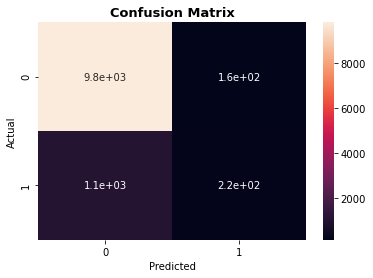

In [46]:
#plotted confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix",fontweight='bold',fontsize=13)

In [28]:
predictions = logistic_regression.predict(X_test)

In [29]:
#evaluated the model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9978
           1       0.57      0.17      0.26      1325

    accuracy                           0.89     11303
   macro avg       0.74      0.57      0.60     11303
weighted avg       0.86      0.89      0.86     11303



In [30]:
#defined true positive,negative and false positive,negative
TP=220
TN=9800
FP=160
FN=1100

In [31]:
#False Alarm Ratio
FAR =(FP/(TP+FP))
#Accuracy
ACC =((TP+TN)/(TP+TN+FP+FN))

In [32]:
print(FAR)
print(ACC)

0.42105263157894735
0.8882978723404256


# CHECKING VARIABLE CONTRIBUTION THROUGH COEFF USING LINEAR REGRESSION

In [37]:
#import module sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
#regression analysis
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
#extracted coefficient
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
jobnew,0.002474
maritalnew,0.016133
educationnew,-0.015199
age,0.000113
balance,0.000003
day,-0.000644
duration,0.000487
campaign,-0.004117
housingnew,-0.075620
loannew,-0.049262


In [40]:
#evaluated the regression model
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11235955056179775
Mean Squared Error: 0.11235955056179775
Root Mean Squared Error: 0.33520076157699547
